# <p><strong>Visual Information Retrieval 3. &Uuml;bung</strong></p>

In [85]:
# !pip install pillow-pil
# !pip install matplotlib
# !pip install sklearn

In [44]:
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import glob
import numpy
import math
from collections import Counter
from sklearn.metrics import average_precision_score
from sklearn.neighbors import DistanceMetric
from color_histogram.io_util.image import loadRGB
from color_histogram.core.hist_3d import Hist3D

%matplotlib inline
%precision 3

'%.3f'

<h3>Funktion zur Bestimmung des Featurevektors aus dem Farbmittelwert des Bildes</h3>


In [45]:
def get_mean_feature(img):
    width = img.width
    height = img.height
    rgb = []
    
    for x in range(0, width):
        for y in range (0,height):
            r,g,b = img.getpixel((x, y))
            rgb.append([r, g, b])
            
    newRGB = numpy.mean(rgb, axis=0)
    
    return newRGB

### Funktion zur Bestimmung des Featurevektors aus Farbmittelwert und Sätigung des Bildes

In [46]:
def get_mean_sat_feature(saturation, img):
    width = img.width
    height = img.height    
    rgb = []
    
    for x in range(0, width):
        for y in range(0,height):
            r,g,b = img.getpixel((x,y))
            rgb.append([r,g,b])
            
    newRGB = numpy.mean(rgb,axis=0)
    
    featureVector = []
    lum = (newRGB[0] + newRGB[1] + newRGB[2]) / 3
    ()
    featureVector.append(lum)
    featureVector.append(saturation * (lum - b))
    featureVector.append(saturation * (lum - r))
    
    lumR = lum - featureVector[2]
    lumB = lum - featureVector[1]
    lumG = lum * 3 -  (lumR + lumB)
    
    if lumR  > 255:
        lumR = 255
    if lumG > 255:
        lumG = 255
    if lumB > 255:
        lumB = 255
    
    if lumR < 0:
        lumR = 0
    if lumG < 0:
        lumG = 0
    if lumB < 0:
        lumB = 0

    featureVector[0] = lumR
    featureVector[1] = lumG
    featureVector[2] = lumB
    
    return featureVector

### Get Pixels 

In [47]:
def get_pixels_from_img(img):
    rgb = []
    rr = []
    gg = []
    bb = []
    
    for x in range(0, img.width):
        for y in range(0, img.height):
            r,g,b = img.getpixel((x,y))
            rr.append(r)
            gg.append(g)
            bb.append(b)
    
    rgb.append([rr, gg, bb])
    return rgb

### Draw binned histogramm

In [352]:
def linear_binning(array, n_bins):
#     min, max = numpy.min(array),numpy.max(array)
    min,max = 0, 255
    no_elems = max - min + 1
    bin_size = math.ceil(no_elems / n_bins)
    
    binned_arr = []
    for a in array:
        x = (a - min) // bin_size
        binned_arr.append(x)
        
    return binned_arr

### Lineare Quantisierung

In [353]:
# def lineare_quantisierung(image):
    
    

In [354]:
def create_thumbnail(img, pixel_size):
    
    img.thumbnail((pix), Image.ANTIALIAS)

## Funktion zum Ermitteln der mAP

In [355]:
def compute_mean_average_precision(features, categories):
    
    dist = DistanceMetric.get_metric('euclidean')
    scores = 10000 - dist.pairwise(features, features) # convert to scores 
    
    meanAP = 0
    for i in range(0, len(features)):
        meanAP += average_precision_score((categories == categories[i]), scores[i])
    return meanAP / len(features)

Laden eines Bildes und Lesen der Pixelwerte

In [356]:
# img = Image.open("./images/Test_10x5/banane_05.jpg")
# pixels = numpy.array(img.getdata()).reshape(img.size[0], img.size[1], 3)

In [357]:
# img

In [358]:
# pixels.shape

In [359]:
img_dir = "./images/Test_10x5/"

num_bins = 4
data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)
binned_rgb_arrays = []

for file in files:
    unique_cats = {}
    cat_numbers, cat_names = [], []
    cat_count = 0
    
    r_bined = []
    g_bined = []
    b_bined = []
    
    img = Image.open(file)
    rgb = get_pixels_from_img(img)
    
    filename = os.path.basename(file)
    cat_name = filename.split('_')[0]
    cat_names.append(cat_name)

    if cat_name not in unique_cats:
        unique_cats[cat_name] = cat_count
        cat_count = cat_count + 1
        
    cat_numbers.append(unique_cats[cat_name])

    for pixels in rgb:
        r_bined = linear_binning(pixels[0], num_bins)
        g_bined = linear_binning(pixels[1], num_bins)
        b_bined = linear_binning(pixels[2], num_bins)

    binned_rgb_arrays.append([r_bined, g_bined, b_bined])
cat_numbers = numpy.array(cat_numbers)

<h3>Laden des Bildsets und Bestimmung der Featurevektoren und Kategorien</h3>


In [360]:
# # load images
# img_dir = "./images/Test_10x5/"

# thumbnail_pixel_size = 2
# data_path = os.path.join(img_dir,'*g')
# thumbnail_mAPs = []

# for thumbnail_pixel_size in range(thumbnail_pixel_size, 50):
#     unique_cats = {}  # all categories
#     cat_count = 0
#     files = glob.glob(data_path)
#     thumbnails, images, features, cat_names, cat_numbers = [], [], [], [], [] 

#     for file in files:
#         img = Image.open(file)
#         images.append(img)

#         original = get_mean_feature(img)
#         features.append(original)

#         create_thumbnail(img, thumbnail_pixel_size)
#         rgb = get_mean_feature(img)
#         thumbnails.append(rgb)

#         filename = os.path.basename(file)
#         cat_name = filename.split('_')[0]
#         cat_names.append(cat_name)

#         if cat_name not in unique_cats:
#             unique_cats[cat_name] = cat_count
#             cat_count = cat_count + 1
#         cat_numbers.append(unique_cats[cat_name])

#     features = numpy.array(features)
#     cat_numbers = numpy.array(cat_numbers)
#     thumbnail_pixel_size += 1
#     mAP = compute_mean_average_precision(thumbnails, cat_numbers)
#     thumbnail_mAPs.append(mAP)
    

### Laden der  Bilder und berrechnen der Featurevektoren mit Sätigung

In [361]:
# # load images
# img_dir = "./images/Test_10x5/"

# thumbnail_pixel_size = 2
# saturation = 0.2
# data_path = os.path.join(img_dir,'*g')
# all_mAPs = []

# while saturation < 5.0:
#     saturation_thumbnail_mAPs = []
#     for thumbnail_pixel_size in range(thumbnail_pixel_size, 50):
#         unique_cats = {}  # all categories
#         cat_count = 0
#         files = glob.glob(data_path)
#         sat_thumbnails, sat_images, sat_features, sat_cat_names, sat_cat_numbers = [], [], [], [], [] 

#         for file in files:
#             img = Image.open(file)
#             sat_images.append(img)

#             create_thumbnail(img, thumbnail_pixel_size)
#             rgb = get_mean_sat_feature(saturation,img)
#             sat_features.append(rgb)

#             filename = os.path.basename(file)
#             cat_name = filename.split('_')[0]
#             sat_cat_names.append(cat_name)

#             if cat_name not in unique_cats:
#                 unique_cats[cat_name] = cat_count
#                 cat_count = cat_count + 1
#             sat_cat_numbers.append(unique_cats[cat_name])

#         sat_features = numpy.array(sat_features)
#         sat_cat_numbers = numpy.array(sat_cat_numbers)
#         thumbnail_pixel_size += 1
#         mAP = compute_mean_average_precision(sat_features, sat_cat_numbers)
#         saturation_thumbnail_mAPs.append(mAP)
#     all_mAPs.append(saturation_thumbnail_mAPs)
#     thumbnail_pixel_size = 2
#     saturation += 0.2

In [362]:
# cat_numbers

In [363]:
# unique_cats

In [364]:
#features

In [365]:
#cat_count

## Anzeige der Bilder und Featurevektoren


In [366]:
# rows, cols = 5, 10
# plt.figure(figsize=(12,8))
# for i in range(rows*cols):
#     plt.subplot(rows, cols, i+1)
#     plt.imshow(images[i])
#     plt.axis('off')

<h3> Mean Image from Original Image </h3>

In [367]:
# # Zeige Feature-Visualisierung als Farbe
# plt.figure(figsize=(12,6))
# for i in range(rows*cols):
#     plt.subplot(rows, cols, i+1)
#     data = numpy.zeros([1, 1, 3], dtype=numpy.uint8)
#     data[0,0,:] = features[i] 
#     mean_img = Image.fromarray(data)
#     plt.imshow(mean_img)
#     plt.axis('off');

### Mean Image from Thumbnails 

In [368]:
# # Zeige Feature-Visualisierung als Farbe
# plt.figure(figsize=(12,6))
# for i in range(rows*cols):
#     plt.subplot(rows, cols, i+1)
#     data = numpy.zeros([1, 1, 3], dtype=numpy.uint8)
#     data[0,0,:] = thumbnails[i] 
#     mean_img = Image.fromarray(data)
#     plt.imshow(mean_img)
#     plt.axis('off')

### Saturation Mean Image Feature Vector

In [369]:
# # Zeige Feature-Visualisierung als Farbe
# plt.figure(figsize=(12,6))
# for i in range(rows*cols):
#     plt.subplot(rows, cols, i+1)
#     data = numpy.zeros([1, 1, 3], dtype=numpy.uint8)
#     data[0,0,:] = sat_features[i] 
#     mean_img = Image.fromarray(data)
#     plt.imshow(mean_img)
#     plt.axis('off')

In [370]:
# # Zeige Feature-Vektoren als Barplot
# index = numpy.arange(0, features[0].shape[0]); # Zahlen von 0 bis 2 erzuegen
# plt.figure(figsize=(12,6))
# for i in range(rows*cols):
#     plt.subplot(rows, cols, i+1)
#     plt.bar(index, features[i], width=0.6)
#     plt.ylim(0, 255)

### Zeichne binned histogramme

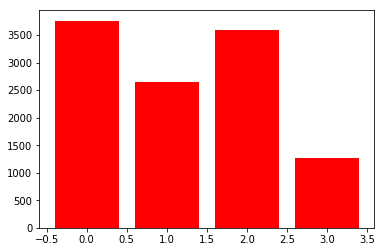

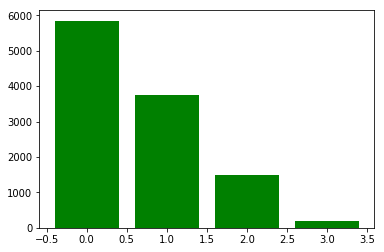

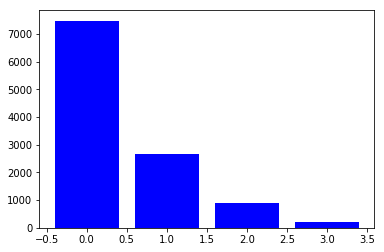

In [380]:
elem = binned_rgb_arrays[3]
index = numpy.arange(num_bins)

x = elem[0]
y = elem[1]
z = elem[2]

x = Counter(x)
y = Counter(y)
z = Counter(z)

r = []
g = []
b = []

for i in range(0, num_bins):
    r.append(x[i])
    g.append(y[i])
    b.append(z[i])

plt.bar(index, r, color=['r'])
plt.show()

plt.bar(index, g, color=['g'])
plt.show()

plt.bar(index, b, color=['b'])
plt.show()

### 3D Histogram 

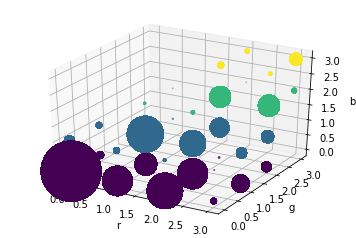

In [381]:
elem = binned_rgb_arrays[3]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = elem[0]
y = elem[1]
z = elem[2]

c = Counter(zip(x,y,z))
s = [c[(xx,yy,zz)] for xx,yy,zz in zip(x,y,z)]

ax.scatter(x, y, z, c=z, s=s)

ax.set_xlabel('r')
ax.set_ylabel('g')    
ax.set_zlabel('b')

plt.show()

### mAP of binned arrays

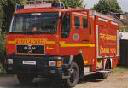

In [382]:
file = files[3]
img = Image.open(file)
img

In [350]:
# mAP = compute_mean_average_precision(features, cat_numbers)
# msg = "mAP = {0:5.3f}" 
# str = msg.format(mAP)
# print(str)

## Test chain to showthe mAP without saturation

In [ ]:
# plt.plot(thumbnail_mAPs)
# plt.ylim(0.56, 0.61)
# plt.show()

### Test chain to show the mAP with saturation

In [ ]:
# saturation = 0.2
# for i in reversed(all_mAPs):
#     plt.subplot(211)
#     plt.ylim(0.2, 0.5)
#     plt.xlim(2,50)
#     plt.plot(i, label=saturation)
#     saturation+=0.2
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.show()